In [2]:
%matplotlib inline

# Import Laibraries For DataAnalysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as pt
import matplotlib.pyplot as plt


# Read or Load Csv Data

In [4]:
df = pd.read_csv("test_enhanced.csv")

# Basic Information of Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Passengerid    179 non-null    int64  
 1   Pclass         179 non-null    int64  
 2   Name           179 non-null    object 
 3   Sex            179 non-null    object 
 4   Age            179 non-null    float64
 5   SibSp          179 non-null    int64  
 6   Parch          179 non-null    int64  
 7   Ticket         179 non-null    object 
 8   Fare           179 non-null    float64
 9   Cabin          42 non-null     object 
 10  Embarked       179 non-null    object 
 11  Title          179 non-null    object 
 12  FamilySize     179 non-null    int64  
 13  IsAlone        179 non-null    int64  
 14  Deck           179 non-null    object 
 15  AgeGroup       179 non-null    object 
 16  FareGroup      179 non-null    object 
 17  EmbarkedClass  179 non-null    object 
 18  GenderClas

# Sample Data

In [6]:
df.head()

,Passengerid,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title,FamilySize,IsAlone,Deck,AgeGroup,FareGroup,EmbarkedClass,GenderClass,TitleClass,FamilyClass
0,713,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,...,Mr,2,0,C,Adult,High,S1,male1,Mr1,21
1,714,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,...,Mr,1,1,U,Young Adult,Medium-Low,S3,male3,Mr3,13
2,715,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,...,Mr,1,1,U,Adult,Medium-Low,S2,male2,Mr2,12
3,716,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,...,Mr,1,1,F,Young Adult,Low,S3,male3,Mr3,13
4,717,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,...,Miss,1,1,C,Adult,High,C1,female1,Miss1,11


# Number of Rows and Columns

In [7]:
print(df.shape)

(179, 21)


# Static Summary of the Data

In [8]:
df.describe()

,Passengerid,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,FamilyClass
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,802.000000,2.335196,28.365475,0.502793,0.379888,30.989710,1.882682,0.642458,21.162011
std,51.816986,0.827506,13.210299,1.246903,0.779540,53.688977,1.749055,0.480621,17.551898
min,713.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,11.000000
25%,757.500000,2.000000,20.000000,0.000000,0.000000,7.895800,1.000000,0.000000,13.000000
50%,802.000000,3.000000,27.000000,0.000000,0.000000,13.000000,1.000000,1.000000,13.000000
75%,846.500000,3.000000,34.000000,1.000000,0.000000,30.000000,2.000000,1.000000,22.500000
max,891.000000,3.000000,74.000000,8.000000,5.000000,512.329200,11.000000,1.000000,113.000000


# Y-Data Profiling

In [9]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Titanic Profiling Report")
profile.to_file("titanic_report.html")


c:\Users\Kashif\miniconda3\envs\profiling\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 35.74it/s]


# Handle Missing Values

In [10]:
#Check the Null values from all the dataset
print(df.isnull().sum())

Passengerid        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            137
Embarked           0
Title              0
FamilySize         0
IsAlone            0
Deck               0
AgeGroup           0
FareGroup          0
EmbarkedClass      0
GenderClass        0
TitleClass         0
FamilyClass        0
dtype: int64


In [11]:
#Fill 0 where null value  occur
df['Cabin'] = df['Cabin'].fillna("0")

In [12]:
# Make another column 
df['HasCabin'] = df['Cabin'].apply(
    lambda x: "No Cabin" if pd.isna(x) or x in [0, "0", "No Cabin"] else "Had Cabin"
)


In [13]:
# Check Values count of the HasCabin Column
print(df['HasCabin'].value_counts())

HasCabin
No Cabin     137
Had Cabin     42
Name: count, dtype: int64


# Check Duplicatees

In [14]:
#  Check Duplicates
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


# Replace Values

In [15]:
# change column type
df['Ticket'] = df['Ticket'].astype(str)
# Replace the Values that have just num like (92821) this replace 
# them  with Num_ at their start soo they are looking like ticketnum
df['Ticket_No'] = df['Ticket'].apply(lambda x: "NUM_" + x if x.isdigit() else x)

# Check result
print(df[['Ticket', 'Ticket_No']].head(15))

      Ticket   Ticket_No
0      19996   NUM_19996
1       7545    NUM_7545
2     250647  NUM_250647
3     348124  NUM_348124
4   PC 17757    PC 17757
5      34218   NUM_34218
6      36568   NUM_36568
7     347062  NUM_347062
8     248727  NUM_248727
9     350048  NUM_350048
10     12233   NUM_12233
11    250643  NUM_250643
12    113806  NUM_113806
13    315094  NUM_315094
14     31027   NUM_31027


In [16]:
# Replace the P class with OrdinalNumbers
df['Pclass'] = df['Pclass'].replace({1: '1st', 2: '2nd', 3: '3rd'})

In [17]:
# Replace Alphabtes with full name
df['Embarked'] = df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# Change Type

In [18]:
#change the type of columns fare and age bcz its float num

df['Age']= df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

# Load Another CSV file

In [19]:
dg =pd.read_csv('train_enhanced.csv')

# Basic information about dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Passengerid    179 non-null    int64 
 1   Pclass         179 non-null    object
 2   Name           179 non-null    object
 3   Sex            179 non-null    object
 4   Age            179 non-null    int64 
 5   SibSp          179 non-null    int64 
 6   Parch          179 non-null    int64 
 7   Ticket         179 non-null    object
 8   Fare           179 non-null    int64 
 9   Cabin          179 non-null    object
 10  Embarked       179 non-null    object
 11  Title          179 non-null    object
 12  FamilySize     179 non-null    int64 
 13  IsAlone        179 non-null    int64 
 14  Deck           179 non-null    object
 15  AgeGroup       179 non-null    object
 16  FareGroup      179 non-null    object
 17  EmbarkedClass  179 non-null    object
 18  GenderClass    179 non-null   

# Check Num of Rows and coulmns

In [21]:
print(dg.shape)

(712, 22)


# Sample of Data

In [22]:
df.head()

,Passengerid,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,IsAlone,Deck,AgeGroup,FareGroup,EmbarkedClass,GenderClass,TitleClass,FamilyClass,HasCabin,Ticket_No
0,713,1st,"Taylor, Mr. Elmer Zebley",male,48,1,0,19996,52,C126,...,0,C,Adult,High,S1,male1,Mr1,21,Had Cabin,NUM_19996
1,714,3rd,"Larsson, Mr. August Viktor",male,29,0,0,7545,9,0,...,1,U,Young Adult,Medium-Low,S3,male3,Mr3,13,No Cabin,NUM_7545
2,715,2nd,"Greenberg, Mr. Samuel",male,52,0,0,250647,13,0,...,1,U,Adult,Medium-Low,S2,male2,Mr2,12,No Cabin,NUM_250647
3,716,3rd,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19,0,0,348124,7,F G73,...,1,F,Young Adult,Low,S3,male3,Mr3,13,Had Cabin,NUM_348124
4,717,1st,"Endres, Miss. Caroline Louise",female,38,0,0,PC 17757,227,C45,...,1,C,Adult,High,C1,female1,Miss1,11,Had Cabin,PC 17757


# Change type

In [23]:
df['Fare'] = df['Fare'].astype(int)
df.head()

,Passengerid,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,IsAlone,Deck,AgeGroup,FareGroup,EmbarkedClass,GenderClass,TitleClass,FamilyClass,HasCabin,Ticket_No
0,713,1st,"Taylor, Mr. Elmer Zebley",male,48,1,0,19996,52,C126,...,0,C,Adult,High,S1,male1,Mr1,21,Had Cabin,NUM_19996
1,714,3rd,"Larsson, Mr. August Viktor",male,29,0,0,7545,9,0,...,1,U,Young Adult,Medium-Low,S3,male3,Mr3,13,No Cabin,NUM_7545
2,715,2nd,"Greenberg, Mr. Samuel",male,52,0,0,250647,13,0,...,1,U,Adult,Medium-Low,S2,male2,Mr2,12,No Cabin,NUM_250647
3,716,3rd,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19,0,0,348124,7,F G73,...,1,F,Young Adult,Low,S3,male3,Mr3,13,Had Cabin,NUM_348124
4,717,1st,"Endres, Miss. Caroline Louise",female,38,0,0,PC 17757,227,C45,...,1,C,Adult,High,C1,female1,Miss1,11,Had Cabin,PC 17757


# Handle Missing Values

In [24]:
print(dg.isnull().sum())

Passengerid        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            550
Embarked           0
Title              0
FamilySize         0
IsAlone            0
Deck               0
AgeGroup           0
FareGroup          0
EmbarkedClass      0
GenderClass        0
TitleClass         0
FamilyClass        0
dtype: int64


In [25]:
#Fill null values with 0
dg['Cabin'] = dg['Cabin'].fillna("0")
dg['HasCabin'] = dg['Cabin'].apply(
    lambda x: "No Cabin" if pd.isna(x) or x in [0, "0", "No Cabin"] else "Had Cabin"
) #Make a new column and replace 0 with No cabin 1 with had Cabin
print(dg['HasCabin'].value_counts())

HasCabin
No Cabin     550
Had Cabin    162
Name: count, dtype: int64


In [26]:
#change type of Ticket column
dg['Ticket'] = dg['Ticket'].astype(str)
# # Replace the Values that have just num like (92821) this replace 
# them  with Num_ at their start soo they are looking like ticketnum
dg['Ticket_No'] = dg['Ticket'].apply(lambda x: "NUM_" + x if x.isdigit() else x)

# Check result
print(dg[['Ticket', 'Ticket_No']].head(15))

              Ticket         Ticket_No
0          A/5 21171         A/5 21171
1           PC 17599          PC 17599
2   STON/O2. 3101282  STON/O2. 3101282
3             113803        NUM_113803
4             373450        NUM_373450
5             330877        NUM_330877
6              17463         NUM_17463
7             349909        NUM_349909
8             347742        NUM_347742
9             237736        NUM_237736
10           PP 9549           PP 9549
11            113783        NUM_113783
12         A/5. 2151         A/5. 2151
13            347082        NUM_347082
14            350406        NUM_350406


In [27]:
# Check again missing Values
print(dg.isnull().sum())

Passengerid      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
FamilySize       0
IsAlone          0
Deck             0
AgeGroup         0
FareGroup        0
EmbarkedClass    0
GenderClass      0
TitleClass       0
FamilyClass      0
HasCabin         0
Ticket_No        0
dtype: int64


# Replace Values

In [28]:
# Replace the P class with OrdinalNumbers
dg['Pclass'] = dg['Pclass'].replace({1: '1st', 2: '2nd', 3: '3rd'})

In [29]:
# Replace Alphabtes with full name
dg['Embarked'] = dg['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# Load and Read other CSV file

In [30]:

dh = pd.read_csv("sample_submission.csv")

# Check Null values

In [31]:
dh.isnull().sum()


Passengerid    0
Survived       0
dtype: int64

#  Queries to analyse this data

1. What proportion of passengers survived overall?

Total passengers: 891
Survivors: 278
Survival proportion: 0.31200897867564537


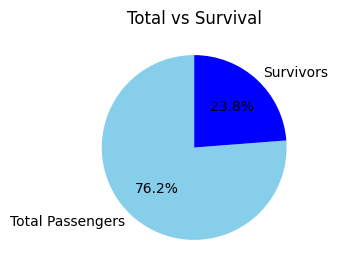

In [41]:
merged_dg = pd.merge(dg, dh, on=['Passengerid', 'Survived'], how='outer')
total_passengers = merged_dg.shape[0] 
survivors = merged_dg['Survived'].sum()
# Calculate survival proportion

survival_proportion = survivors / total_passengers

print("Total passengers:", total_passengers)
print("Survivors:", survivors)
print("Survival proportion:", survival_proportion)

# Create dataframe for plotting
data = pd.DataFrame({
    "Category": ["Total Passengers", "Survivors"],
    "Count": [total_passengers, survivors]
})
plt.figure(figsize=(3,3))

plt.pie(
    data["Count"],
    labels=data["Category"],
    autopct="%1.1f%%",       # show percentages
    colors=["skyblue", "blue"],
    startangle=90,
)


plt.savefig("passengers_vs_survivors.png", dpi=300, bbox_inches="tight")
plt.title("Total vs Survival")
plt.show()
plt.close()


 Q2 Did gender influence survival rates?

      Sex  Survived  Survival Rate (%)
0  female  0.605096          60.509554
1    male  0.152513          15.251300


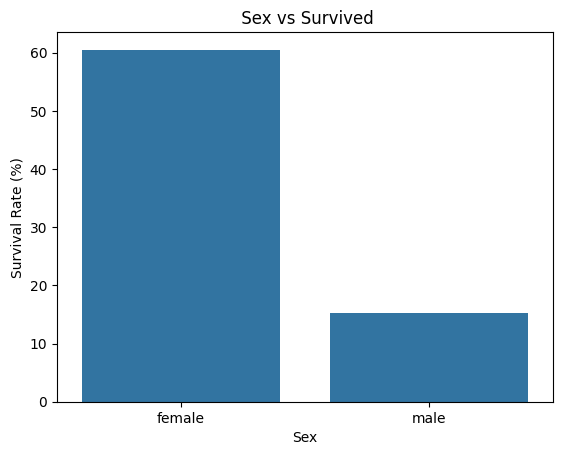

In [38]:
merge_data = pd.merge(df, dh, on=['Passengerid'], how='outer')
merged_df = pd.merge(
	merge_data[['Passengerid', 'Survived', 'Sex']],
	dg[['Passengerid', 'Survived', 'Sex']],
	how='outer'
)
survival_rate = merged_df.groupby('Sex')['Survived'].mean().reset_index()
survival_rate['Survival Rate (%)'] = survival_rate['Survived'] * 100
print(survival_rate)

sns.barplot(data=survival_rate, x='Sex', y='Survival Rate (%)')
plt.title(" Sex vs Survived")
plt.savefig("sex_vs_survivors.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

3. How did passenger class (Pclass) affect survival?

  Pclass  Survived  Survival Rate (%)
0    1st  0.495370          49.537037
1    2nd  0.391304          39.130435
2    3rd  0.201629          20.162933


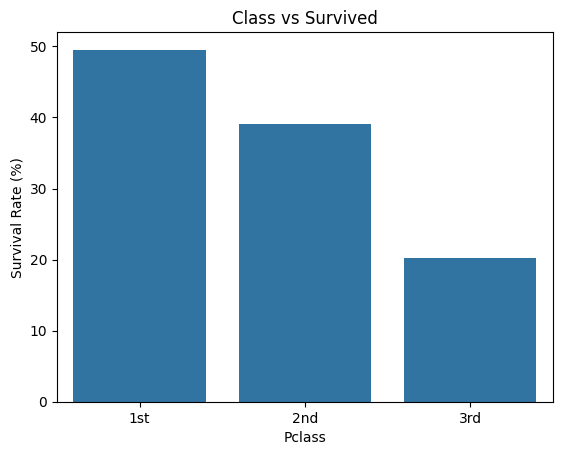

In [42]:
merge_data = pd.merge(df, dh, on=['Passengerid'], how='outer')
merged_df = pd.merge(
	merge_data[['Passengerid', 'Survived', 'Pclass']],
	dg[['Passengerid', 'Survived', 'Pclass']],
	how='outer'
)
survival_rate = merged_df.groupby('Pclass')['Survived'].mean().reset_index()
survival_rate['Survival Rate (%)'] = survival_rate['Survived'] * 100
print(survival_rate)

sns.barplot(data=survival_rate, x='Pclass', y='Survival Rate (%)')
plt.title("Class vs Survived")
plt.savefig("Class_vs_survivors.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

 4. Were children more likely to survive than adults?

      AgeGroup  Survived  Survival Rate (%)
0        Adult  0.327273          32.727273
1        Child  0.424658          42.465753
2       Senior  0.181818          18.181818
3     Teenager  0.398058          39.805825
4  Young Adult  0.274841          27.484144


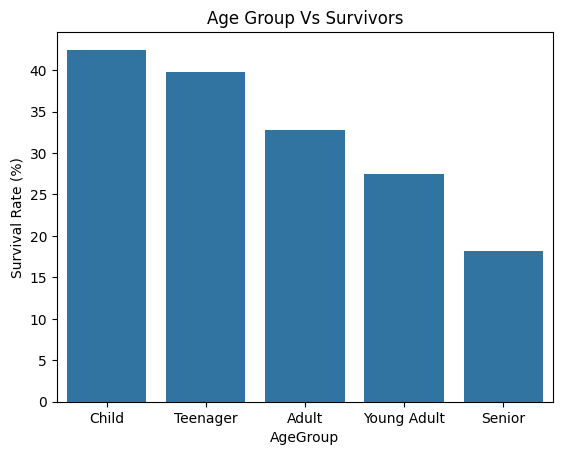

In [43]:
merge_data = pd.merge(df, dh, on=['Passengerid'], how='outer')
merged_df = pd.merge(
	merge_data[['Passengerid', 'Survived', 'AgeGroup']],
	dg[['Passengerid', 'Survived', 'AgeGroup']],
	how='outer'
)
survival_rate = merged_df.groupby('AgeGroup')['Survived'].mean().reset_index()
survival_rate['Survival Rate (%)'] = survival_rate['Survived'] * 100
print(survival_rate)

# Sort the DataFrame by 'Survival Rate (%)' in descending order before plotting
survival_rate_sorted = survival_rate.sort_values(by='Survival Rate (%)', ascending=False)
sns.barplot(data=survival_rate_sorted, x='AgeGroup', y='Survival Rate (%)')
plt.title("Age Group Vs Survivors")
plt.savefig("Age Group_vs_survivors.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

 5. Did traveling with family impact survival chances?

C:\Users\Kashif\AppData\Local\Temp\ipykernel_7020\1204842456.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = merged_df.groupby('FamilySize_Binned')['Survived'].mean().reset_index()


  FamilySize_Binned  Survived  Survival Rate (%)
0              Solo       NaN                NaN
1             Small  0.251397          25.139665
2            Medium  0.456274          45.627376
3             Large  0.363636          36.363636
4        Very Large  0.175000          17.500000


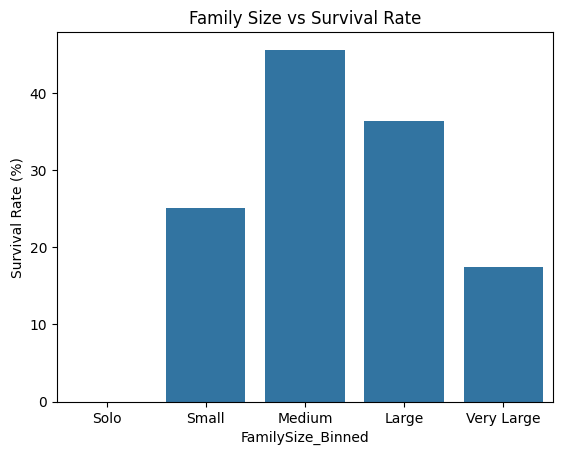

In [44]:
merge_data = pd.merge(df, dh, on=['Passengerid'], how='outer')
merged_df = pd.merge(
    merge_data[['Passengerid', 'Survived', 'FamilySize']],
    dg[['Passengerid', 'Survived', 'FamilySize']],
    how='outer'
)

# Define bins and labels
bins = [0, 1, 2, 4, 6, 10]  # Adjust bins according to your data
labels = ['Solo', 'Small', 'Medium', 'Large', 'Very Large']

# Bin FamilySize
merged_df['FamilySize_Binned'] = pd.cut(merged_df['FamilySize'], bins=bins, labels=labels, right=False)

# Calculate survival rate by binned family size
survival_rate = merged_df.groupby('FamilySize_Binned')['Survived'].mean().reset_index()
survival_rate['Survival Rate (%)'] = survival_rate['Survived'] * 100

# Print the survival rate
print(survival_rate)
sns.barplot(data=survival_rate, x='FamilySize_Binned', y='Survival Rate (%)')
plt.title('Family Size vs Survival Rate')
plt.savefig("Family Size_vs_survivors.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

6. Did  embarkation port influence survival?

      Embarked  Survived  Survival Rate (%)
0    Cherbourg  0.446429          44.642857
1   Queenstown  0.363636          36.363636
2  Southampton  0.270898          27.089783


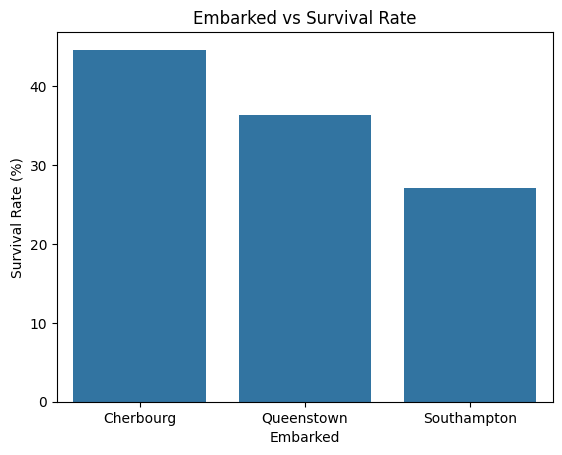

In [50]:
merge_data = pd.merge(df, dh, on=['Passengerid'], how='outer')
merged_df = pd.merge(
    merge_data[['Passengerid', 'Survived', 'Embarked']],
    dg[['Passengerid', 'Survived', 'Embarked']],
    how='outer'
)

# Calculate survival rate by embarkation point
survival_rate = merged_df.groupby('Embarked')['Survived'].mean().reset_index()
survival_rate['Survival Rate (%)'] = survival_rate['Survived'] * 100

# Print the survival rates
print(survival_rate)

# Plotting the survival rate by embarkation point
sns.barplot(data=survival_rate, x='Embarked', y='Survival Rate (%)')
plt.title('Embarked vs Survival Rate')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Embarked')
plt.savefig("Embarked_vs_survivors.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

 6. Did assigned Cabin affect in Survival Rate ?

    HasCabin  Survived  Survival Rate (%)
0  Had Cabin  0.519608          51.960784
1   No Cabin  0.250364          25.036390


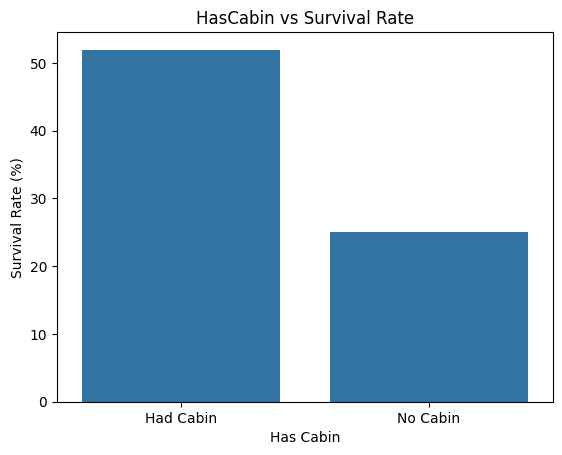

In [46]:


# Assuming df, dh, and dg are defined and contain the relevant data

# Merging data
merge_data = pd.merge(df, dh, on=['Passengerid'], how='outer')
merged_df = pd.merge(
    merge_data[['Passengerid', 'Survived', 'HasCabin']],
    dg[['Passengerid', 'Survived', 'HasCabin']],
    how='outer'
)

# Calculate survival rate by cabin presence
survival_rate = merged_df.groupby('HasCabin')['Survived'].mean().reset_index()
survival_rate['Survival Rate (%)'] = survival_rate['Survived'] * 100

# Print the survival rates
print(survival_rate)

# Plotting the survival rate by cabin presence
sns.barplot(data=survival_rate, x='HasCabin', y='Survival Rate (%)')
plt.title('HasCabin vs Survival Rate')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Has Cabin')
plt.savefig("Cabin_vs_survivors.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

Which group (GenderClass) had the highest survival rate?

  GenderClass  Survived  Survival Rate (%)
0     female1  0.744681          74.468085
1     female2  0.763158          76.315789
2     female3  0.430556          43.055556
3       male1  0.303279          30.327869
4       male2  0.129630          12.962963
5       male3  0.106628          10.662824


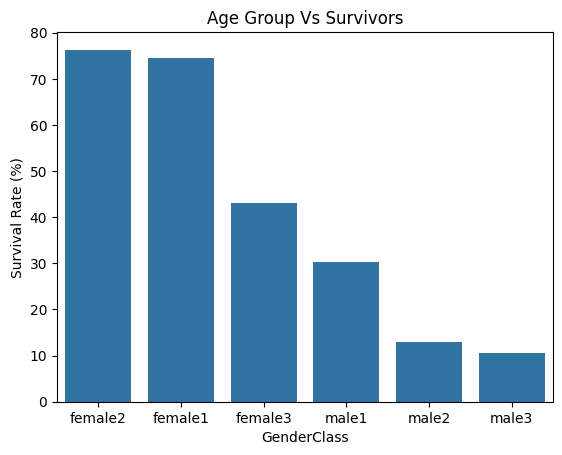

In [47]:
merge_data = pd.merge(df, dh, on=['Passengerid'], how='outer')
merged_df = pd.merge(
	merge_data[['Passengerid', 'Survived', 'GenderClass']],
	dg[['Passengerid', 'Survived', 'GenderClass']],
	how='outer'
)
survival_rate = merged_df.groupby('GenderClass')['Survived'].mean().reset_index()
survival_rate['Survival Rate (%)'] = survival_rate['Survived'] * 100
print(survival_rate)
survival_rate_sorted = survival_rate.sort_values(by='Survival Rate (%)', ascending=False)
sns.barplot(data=survival_rate_sorted, x='GenderClass', y='Survival Rate (%)')
plt.title("Age Group Vs Survivors")
plt.savefig("AgeGroup_vs_survivors.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

Is Fare have any impact on Survival rate?

     FareGroup  Survived  Survival Rate (%)
0         High  0.474886          47.488584
1          Low  0.185654          18.565401
2  Medium-High  0.374429          37.442922
3   Medium-Low  0.222222          22.222222


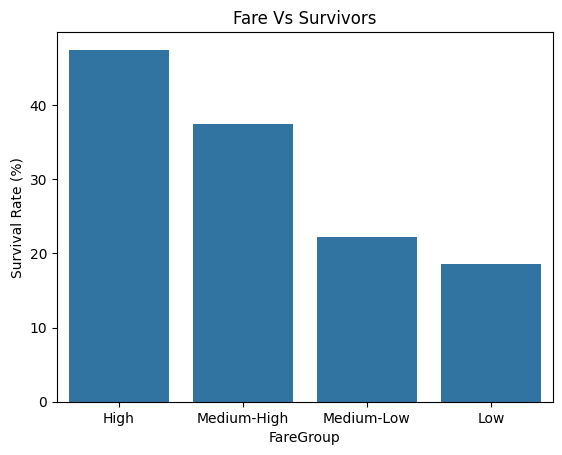

In [48]:
merge_data = pd.merge(df, dh, on=['Passengerid'], how='outer')
merged_df = pd.merge(
	merge_data[['Passengerid', 'Survived', 'FareGroup']],
	dg[['Passengerid', 'Survived','FareGroup']],
	how='outer'
)
survival_rate = merged_df.groupby('FareGroup')['Survived'].mean().reset_index()
survival_rate['Survival Rate (%)'] = survival_rate['Survived'] * 100
print(survival_rate)

survival_rate_sorted = survival_rate.sort_values(by='Survival Rate (%)', ascending=False)
sns.barplot(data=survival_rate_sorted, x='FareGroup', y='Survival Rate (%)')
plt.title("Fare Vs Survivors")
plt.savefig("Fare_vs_survivors.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()